In [1]:
import pandas as pd
import numpy as np

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
f=pd.read_csv("diabetes.csv")

In [3]:
f

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data=np.array(f)
np.random.shuffle(data)

In [5]:
f["Pregnancies"]

0       6
1       1
2       8
3       1
4       0
       ..
763    10
764     2
765     5
766     1
767     1
Name: Pregnancies, Length: 768, dtype: int64

In [6]:
x_train,y_train=data[:600],data[:600]

In [7]:
x_train[0],data[573]

(array([2.00e+00, 9.00e+01, 7.00e+01, 1.70e+01, 0.00e+00, 2.73e+01,
        8.50e-02, 2.20e+01, 0.00e+00]),
 array([  1.   , 109.   ,  60.   ,   8.   , 182.   ,  25.4  ,   0.947,
         21.   ,   0.   ]))

In [8]:
x_train,y_train=np.array(list(map(lambda x: x[:-1],x_train))),np.array(list(map(lambda x: x[-1],y_train)))

In [9]:
x_train[0]

array([2.00e+00, 9.00e+01, 7.00e+01, 1.70e+01, 0.00e+00, 2.73e+01,
       8.50e-02, 2.20e+01])

In [10]:
len(y_train)

600

In [11]:
x_train[573],data[573]

(array([  1.   , 109.   ,  60.   ,   8.   , 182.   ,  25.4  ,   0.947,
         21.   ]),
 array([  1.   , 109.   ,  60.   ,   8.   , 182.   ,  25.4  ,   0.947,
         21.   ,   0.   ]))

In [12]:
x_test,y_test=data[600:],data[600:]
x_test,y_test=np.array(list(map(lambda x: x[:-1],x_test))),np.array(list(map(lambda x:x[-1],y_test)))

In [13]:
x_test,y_test

(array([[1.00e+00, 1.38e+02, 8.20e+01, ..., 4.01e+01, 2.36e-01, 2.80e+01],
        [8.00e+00, 1.81e+02, 6.80e+01, ..., 3.01e+01, 6.15e-01, 6.00e+01],
        [3.00e+00, 1.48e+02, 6.60e+01, ..., 3.25e+01, 2.56e-01, 2.20e+01],
        ...,
        [2.00e+00, 1.20e+02, 5.40e+01, ..., 2.68e+01, 4.55e-01, 2.70e+01],
        [7.00e+00, 1.79e+02, 9.50e+01, ..., 3.42e+01, 1.64e-01, 6.00e+01],
        [0.00e+00, 1.19e+02, 0.00e+00, ..., 3.24e+01, 1.41e-01, 2.40e+01]]),
 array([0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
        0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
   

[0.88854663]


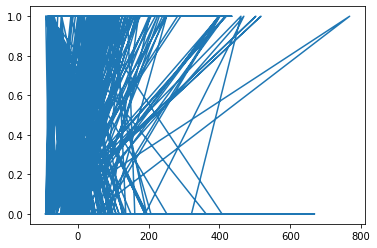

In [14]:
x=np.array(list(map(lambda x: x[:-1],data)))
y=np.array(list(map(lambda x: x[-1],data)))

pca = PCA(n_components=1)
d=pca.fit_transform(x)
print(pca.explained_variance_ratio_)
plt.plot(d,y)

In [15]:
model=Sequential()
model.add(Dense(10,activation="relu",input_dim=8))
model.add(Dense(12,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(6,activation="relu"))
model.add(Dense(3,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [16]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [17]:
model.fit(x_train,y_train,epochs=50)

Train on 600 samples
Epoch 1/50
600/600 [==============================] - 1s 1ms/sample - loss: 8.3440 - accuracy: 0.6417
Epoch 2/50
600/600 [==============================] - 0s 44us/sample - loss: 3.9621 - accuracy: 0.6417
Epoch 3/50
600/600 [==============================] - 0s 52us/sample - loss: 2.3687 - accuracy: 0.6417
Epoch 4/50
600/600 [==============================] - 0s 53us/sample - loss: 1.4845 - accuracy: 0.6417
Epoch 5/50
600/600 [==============================] - 0s 53us/sample - loss: 0.9998 - accuracy: 0.6417
Epoch 6/50
600/600 [==============================] - 0s 62us/sample - loss: 0.7826 - accuracy: 0.6417
Epoch 7/50
600/600 [==============================] - 0s 53us/sample - loss: 0.7044 - accuracy: 0.6083
Epoch 8/50
600/600 [==============================] - 0s 57us/sample - loss: 0.6668 - accuracy: 0.6067
Epoch 9/50
600/600 [==============================] - 0s 56us/sample - loss: 0.6538 - accuracy: 0.6150
Epoch 10/50
600/600 [==============================] 

In [18]:
model.evaluate(x_test,y_test,verbose=2)

168/1 - 0s - loss: 0.6255 - accuracy: 0.6250


[0.6515542722883678, 0.625]